In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
import math
import matplotlib.lines as mlines

In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
def readNPDBFiles(path, n):
    file = open(path, "r")
    lines = file.readlines()
    pdbs = [(line.strip()[:4], line.strip()[4:5]) for line in lines[1:]]
    random.shuffle(pdbs)
    return pdbs[1:n]

In [4]:
def getPDBFile(pdb):
        try:
            url = "https://files.rcsb.org/view/{}.pdb".format(pdb)
            response = urllib.request.urlopen(url)
            data = response.read()
            text = data.decode('utf-8')
            text = text.split('\n')
            return(text)
        except:
            return([])

In [5]:
def AnalyzePDB_Q1(pdbs):
    freq = {}
    processed = 1
    for pdb in pdbs:
        update_progress(processed / len(pdbs))
        print("Processing {}/{}".format(processed, len(pdbs)))
        lines = getPDBFile(pdb[0])
        helixLines = [line for line in lines if line.startswith("HELIX")]
        for idx, helix, in enumerate(helixLines):
            if(helix[19].strip() == pdb[1]):
                helixClass = helix[39:40].strip()
            
                if helixClass not in freq:
                    freq[helixClass] = 1
                else:
                    freq[helixClass] += 1
        processed+=1
    return freq

In [6]:
%%time
pdbs = readNPDBFiles("cullpdb_pc30_res3.0_R1.0_d191017_chains18877", 18877)
freq = AnalyzePDB_Q1(pdbs)

Progress: [####################] 100.0%
Processing 18876/18876
CPU times: user 4min 23s, sys: 1min 8s, total: 5min 32s
Wall time: 9h 56min 53s


(-1.1198752435240864,
 1.1081138724739727,
 -1.1186827837105784,
 1.1008896563671704)

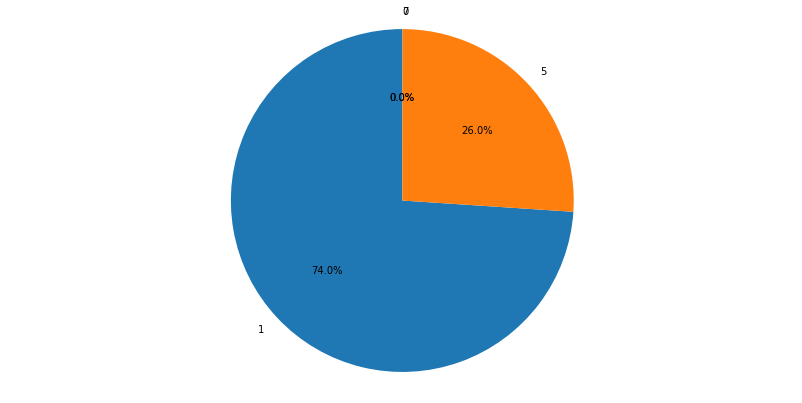

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
x = [freq[entry] for entry in freq]
plotList = [entry for entry in freq]
ax.pie(x, labels=plotList, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.